# Predict the lowest Chulalongkorn engineering score from the GAT-PAT score

จัดทำโดยนักศึกษาชั้นปีที่ 2 คณะวิศวกรรมศาสตร์ สาขาวิศวกรรมไฟฟ้า จุฬาลงกรณ์มหาวิทยาลัย

1. เขมกร เชื้อลี 6330041121
2. พรพิพัฒน์ พงษ์ศิริ 6330342021
3. ประสพโชค รอดศิริ 6330304221

และเป็นส่วนหนึ่งของรายวิชา 2102203 Probability and Statistics for Electrical Engineers

### จุดประสงค์
ทำนายคะแนนต่ำสุดที่ใช้ในการสอบเข้าคณะวิศวกรรมศาสตร์จุฬาลงกรณ์มหาวิทยาลัยจากข้อมูล
จำนวนคนตามช่วงคะแนนของ PAT3, PAT1 และ GAT เพื่อช่วยในการตัดสินใจในการเลือกอันดับ Admission ของนักเรียนมัธยมศึกษาปีที่ 6 ในปีถัดๆ ไป

### ไฟล์ข้อมูล Excel
Download file data [data](https://docs.google.com/spreadsheets/d/10mS0xaUM4UVwmwFt6awZuBKeTbeVMmtHTWGhutbVvmk/edit?usp=sharing) save as (.xlsx) file. upload file to the folder in left hand side before running this code.

## จัดการข้อมูล


*   แบ่งข้อมูลเป็นรายวิชาที่ใช้ในการคิดคะแนนสอบเข้าวิศวกรรมศาสตร์จุฬา 
    *   Pat1, Pat3 และ Gat
*   โดยเป็นข้อมูล score distribution ตั้งแต่ปี 2556 - 2564 โดยแบ่งเป็นข้อมูลจำนวนคน ในช่วงคะแนนละ 30 คะแนน ตั้งแต่ 0 - 300 คะแนน

In [ ]:
import numpy as np
import pandas as pd
import scipy

In [ ]:
path =  '/content/vidva_weight.xlsx'
df = pd.read_excel(path) 

gat = pd.read_excel(path, sheet_name='gat').set_index('year')
pat1 = pd.read_excel(path, sheet_name='pat1').set_index('year')
gat_weight = pd.read_excel(path, sheet_name='gat_weight').set_index('year')
pat1_weight = pd.read_excel(path, sheet_name='pat1_weight').set_index('year')
pat3 = pd.read_excel(path, sheet_name='pat3').set_index('year')
chula_df = pd.read_excel(path, sheet_name='vidva_data').set_index('year')

In [ ]:
pat3

,0-30,30-60,60-90,90-120,120-150,150-180,180-210,210-240,240-270,270-300
year,,,,,,,,,,
64,53,4795,12634,6060,2196,1145,698,338,140,15
63,22,3084,14273,9341,3381,1567,880,475,114,10
62,63,5796,15610,7708,2754,1270,730,429,129,4
61,82,7119,16272,7348,2944,1649,979,582,320,52
60,28,4806,22046,15502,4665,1858,932,563,199,24
59,169,14904,28379,9171,2816,1340,683,330,82,5
58,57,7943,21900,11124,4429,2079,1193,686,330,35
57,34,3226,13685,11207,3976,1803,808,415,135,13
56,169,10829,21101,9958,4463,2305,1337,767,298,8


In [ ]:
pat1_weight

,0-30,30-60,60-90,90-120,120-150,150-180,180-210,210-240,240-270,270-300
year,,,,,,,,,,
64,675,11644,10126,3252,1309,571,272,132,67,26
63,4103,16814,7820,2150,921,559,343,206,149,82
62,9147,18210,4693,1262,591,316,158,76,30,10
61,8848,20846,5680,1111,454,217,108,51,24,8
60,17824,26014,4767,1088,444,234,132,74,28,18
59,4407,37465,13533,1611,505,215,88,37,14,4
58,6256,31928,10180,1042,240,83,33,9,4,1
57,3331,19686,9766,1655,544,215,78,20,5,2
56,17296,28548,4004,805,330,149,67,27,6,3


In [ ]:
gat_weight

,0-30,30-60,60-90,90-120,120-150,150-180,180-210,210-240,240-270,270-300
year,,,,,,,,,,
64,1076,4013,3550,4187,4005,3658,3510,2388,1327,360
63,805,3434,3237,3860,4878,6206,5453,3251,1664,359
62,711,3623,4412,4953,4560,4877,4959,3383,2243,772
61,1293,5591,3119,2908,3934,7033,7418,3898,1773,380
60,1499,7650,7655,7421,7754,8698,6434,2748,687,77
59,2322,10281,9626,9301,9504,7141,6020,2747,832,105
58,594,7466,8066,7382,6305,6142,7369,4409,1630,413
57,366,4370,3816,3876,4891,6656,6373,3361,1366,227
56,928,11160,10315,7728,6722,5853,4431,2534,1237,327


**แผนภูมิแท่งเปรียบเทียบจำนวนนักเรียนทั้งหมดที่สอบ GAT, PAT1 กับ จำนวนนักเรียนที่สอบ Gat และ PAT3, PAT1 และ PAT3**

![alt text](https://drive.google.com/uc?id=1Hagkc0HyGRbnO23wTQLGvnsd5j183ruD)

## Function



*range_score_interested(lower, upper, subject, year)*

สร้าง list of tuple ที่มีสมาชิกเป็น (lower, lower+30, จำนวนคน) โดยที่ lower+30 <= upper
```
range_score_interested(150, 300, pat1_weight, 64) 
>> [(150, 180, 571), (180, 210, 272), (210, 240, 132), (240, 270, 67), (270, 300, 26)]
```





*random_data_by_weight(range_score_interested(lower, upper, subject, year))*\
สุ่มคะแนนในช่วงคะแนนต่างๆ ตามจำนวนนักเรียนในช่วงนั้นๆ แบบ Uniform([30n, 30(n+1)]) เมื่อ n เป็นสมาชิกของ {0,1, 2, ..., 9} \
ดังนั้น จะได้ว่านักเรียนแต่ละคนจะมีคะแนนเป็นของตัวเองคนละ 1 ครั้ง
```
rand_data_by_weight([(150, 180, 571), (180, 210, 272)])
>> array([165, 157, 157, ..., 179, 180, 185, 182, ..., 210, 205])
```

*shuffle()*\
สลับตำแหน่งข้อมูล เนื่องจากฟังก์ชัน random_data_by_weight จะสุ่มแบบเรียงลำดับจากน้อยไปมาก
```
pat1_rv = rand_data_by_weight(range_score_interested(0, 300, 'pat1_weight', 64))
print(pat1_rv)
>> [ 29  28  26 ... 296 279 276]
np.random.shuffle(pat1_rv)
print(pat1_rv)
>> [ 44  61  93 ...  33  74 128]
```

*cal_enroll_score(year)*\
คำนวณผลรวมคะแนนโดยมีตัวคูณคะแนน PAT1:PAT3:GAT = 20:60:20\
คืนข้อมูลเป็นข้อมูลคะแนนรวมของนักเรียนที่สอบทั้ง PAT3, PAT1 และ GAT\
```
cal_enroll_score(64)
>> array([27220, 27060, 26520, ..., 16780, 16740, 16560])
```


*find_best_reject()*\
หาจำนวนคนที่สอบ PAT3 แต่ไม่ยื่นเข้าวิศวะจุฬา ที่ทำให้ MAE(Mean Absolute Error) ของ predictMinScore VS Minscore 
```
find_best_reject()
>> 978 (จำนวนคนที่จะไม่ยื่น)
```

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_bar(score_data):
    """ Plot histogram for total score """
    histogram = Counter(min(score//1000*1000, 29000) for score in score_data)
    plt.bar([lower_bound+500 for lower_bound in histogram.keys()], 
            histogram.values(), 
            1000, 
            edgecolor=(0,0,0)
            )
    plt.xlabel('total score intake to Chula ENG')
    plt.ylabel('Number of people in inteval 1000')
    plt.show()

In [ ]:
def range_score_interested(lower, upper, subject, year):
    interval = [lower + (n*30) for n in range((upper-lower) // 30 + 1)]
    rand_score = [(lower + n*30, lower+((n+1)*30), eval(subject)[str(lower+n*30)+'-'+str(lower+((n+1)*30))][year]) for n in range((upper-lower) // 30)]
    return rand_score

In [ ]:
def rand_data_by_weight(data: list):
    """ uniform random score with exact number of data in score range"""
    collect_intvs = [np.random.randint(interval[0], interval[1], interval[2]) for interval in data]
    return np.concatenate(collect_intvs)

In [ ]:
def shuffle(pat1, pat3, gat):
    """shuffle data"""
    np.random.shuffle(pat3)
    np.random.shuffle(pat1)
    np.random.shuffle(gat)
    return pat1, pat3, gat

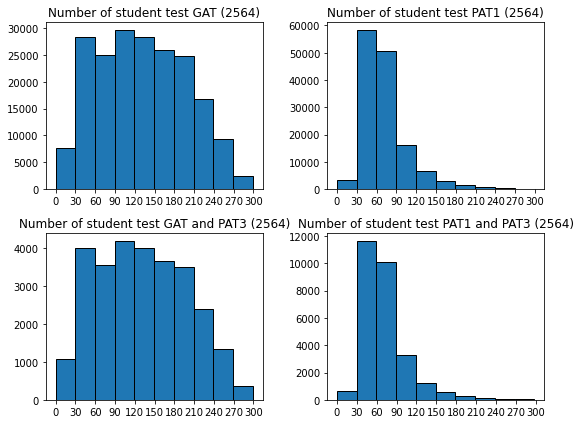

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(8, 6), tight_layout=True)
fig.tight_layout()
gat_plot = rand_data_by_weight(range_score_interested(0, 300, 'gat', 64))
pat1_plot = rand_data_by_weight(range_score_interested(0, 300, 'pat1', 64))
pat1_weight_plot = rand_data_by_weight(range_score_interested(0, 300, 'pat1_weight', 64))
gat_weight_plot = rand_data_by_weight(range_score_interested(0, 300, 'gat_weight', 64))
plt.setp(axs, xticks=[x for x in range(0, 301, 30)])

axs[0, 0].hist(gat_plot, edgecolor='black'), axs[0, 0].set_title('Number of student test GAT (2564)')
axs[0, 1].hist(pat1_plot, edgecolor='black'), axs[0, 1].set_title('Number of student test PAT1 (2564)')
axs[1, 0].hist(gat_weight_plot, edgecolor='black'), axs[1, 0].set_title('Number of student test GAT and PAT3 (2564)')
axs[1, 1].hist(pat1_weight_plot, edgecolor='black'), axs[1, 1].set_title('Number of student test PAT1 and PAT3 (2564)')
plt.show()

In [ ]:
def cal_enroll_score(year):
    """ Calculate total score by weight PAT1:PAT3:GAT = 20:20:60 """
    pat1_rv = rand_data_by_weight(range_score_interested(0, 300, 'pat1_weight', year))
    pat3_rv = rand_data_by_weight(range_score_interested(150, 300, 'pat3', year))
    gat_rv = rand_data_by_weight(range_score_interested(180, 300, 'gat_weight', year))

    pat1_rv = sorted(pat1_rv)[::-1][:1600]
    pat3_rv = sorted(pat3_rv)[::-1][:1600]
    pat1_rv, pat3_rv, gat_rv = shuffle(pat1_rv, pat3_rv, gat_rv)
    min_num = min(len(pat1_rv), len(pat3_rv), len(gat_rv))

    pat1_rv = np.array([pat1_rv[:min_num]]) * 20
    gat_rv =  np.array([gat_rv[:min_num]]) * 20
    pat3_rv =  np.array([pat3_rv[:min_num]]) * 60
    enroll_score = np.sum(np.concatenate((pat3_rv, pat1_rv, gat_rv), axis=0), axis=0)
    enroll_score = np.sort(enroll_score)[::-1]
    return enroll_score

In [ ]:
def find_best_reject():
    """ error can be negative(less than real min score) and positive """
    years_err = []
    min_n = min(1600-chula_df['intake'])
    for year in range(56,65):
        year_err = []
        enroll_score = cal_enroll_score(year)
        real_min, intake = chula_df['min_score'][year],  chula_df['intake'][year]
        for reject in range(0, min_n+1):
            reject_index = np.random.randint(0,  len(enroll_score), reject)
            enroll_score_af_reject =  np.delete(enroll_score, reject_index)
            pred_min =  enroll_score_af_reject[chula_df['intake'][year]]
            err = abs(real_min-pred_min)
            year_err.append(err)
        years_err.append(year_err)
    min_n_reject = min([len(data) for data in years_err])
    data = np.array([year_err[:min_n_reject] for year_err in years_err])
    return np.argmin(np.sum(data, axis=0)/(2564-2556+1))

In [ ]:
# Central Limit Theorem
n = np.round(np.mean([find_best_reject() for _ in range(50)]))
n

980.0

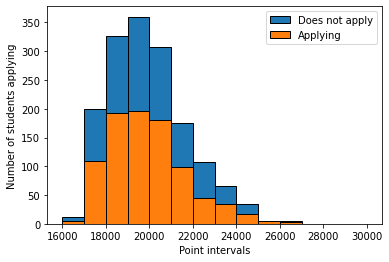

In [ ]:
year = 64
enroll_score = cal_enroll_score(year)
i = np.random.randint(0,  len(enroll_score), 978)
enroll_score_af_reject =  np.delete(enroll_score, i)
plt.hist(enroll_score, edgecolor='Black', bins=[x*1000 for x in range(16, 31, 1)])
plt.hist(enroll_score_af_reject, edgecolor='Black', bins=[x*1000 for x in range(16, 31, 1)])
plt.legend(['Does not apply', 'Applying'])
plt.xlabel('Point intervals')
plt.ylabel('Number of students applying')
plt.show()

## Prediction

In [ ]:
def predict():
    data = {'year':[], 'predictMinScore':[], 'MinScore': [], 'error':[]}
    
    for year in range(64, 55, -1):
        real_min = chula_df['min_score'][year]
        enroll_score = cal_enroll_score(year)
        # pos = np.random.randint(0,  len(enroll_score), n)
        pos = np.random.randint(0,  len(enroll_score), 978)
        enroll_score_rej = np.delete(enroll_score, pos)
        min_score = int(enroll_score_rej[chula_df['intake'][year]])

        data['year'].append(year)
        data['predictMinScore'].append(np.round(min_score, 2))
        data['MinScore'].append(np.round(real_min, 2))
        data['error'].append(np.round(real_min-min_score, 2))
    df = pd.DataFrame(data, columns=['year', 'predictMinScore', 'MinScore', 'error'])
    return df

In [ ]:
df = predict()
df

,year,predictMinScore,MinScore,error
0,64,19820,18503,-1317
1,63,20280,19985,-295
2,62,19640,18360,-1280
3,61,19140,17030,-2110
4,60,18900,18870,-30
5,59,17720,17510,-210
6,58,19060,19090,30
7,57,18280,18552,272
8,56,19220,19100,-120


In [ ]:
# Central Limit Theorem
df = predict() 
for i in range(50): 
    df = df.append(predict())

In [ ]:
# Find mean of PMS(predictMinScore) and mean of Error
gb_year = df.groupby('year')
df1 = gb_year['predictMinScore'].apply(list).reset_index(name='predictMinScore')
df2 = gb_year['error'].apply(list).reset_index(name='error')
result = df1.merge(df2)
result = result.iloc[::-1].reset_index(drop=True)
result['realMinScore'] = chula_df['min_score'].reset_index()['min_score']
result['meanPMS'] = np.round(result['predictMinScore'].apply(np.mean).to_frame())
result['meanError'] = np.round(result['error'].apply(np.mean).to_frame())

### ผลการทดลอง
1. ได้ผลการทดลองดังตาราง จากผลของแต่ละปีมี error ไม่เกิน 7%  ยกเว้นปี 2561 เนื่องจาก 2561 มีการปรับเปลี่ยนการสอบโดยแบ่งเป็น 2 รอบ โดยมีรอบ 3.1 และ 3.2 และในรอบ 3.1 ผู้เข้าสอบ 1 คนสามารถยื่นได้ 4 คณะและมีสิทธิ์เลือกได้ทั้ง 4 คณะว่าจะเอาคณะไหน ทำให้เกิดปัญหา อย่างเช่น
ผู้สมัครที่อยากเรียนแพทย์ซึ่งมีคะแนนที่สูงแต่ไม่มั่นใจว่าจะติดเลือกวิศวะจุฬาไว้เป็นตัวเลือกสำรอง ดังนั้นจึงทำให้ข้อมูลคะแนนขั้นต่ำที่ประกาศออกมาสูงมากทำให้ข้อมูลที่เราได้รับมามีค่า error ที่สูง 
2. เนื่องจาก ค่าทำนายส่วนใหญ่สูงกว่าค่าจริง และค่าทำนายที่ต่ำกว่าค่าจริงมีน้อย ในปี 2557 ค่าทำนายต่ำกว่าค่าต่ำสุดจริง เท่ากับ 316 คะแนน ซึ่งเป็นค่าทำนายที่ต่ำที่กว่าค่าจริงที่มี Error มากที่สุด
    ดังนั้นหากทำนายหาค่า predictMinScore ปี 2565 จะได้ว่า
นักเรียนที่มี คะแนน >= predictMinScore + 316 คะแนน มีโอกาสเข้าศึกคณะวิศวกรรมศาสตร์อย่างแน่นอนจากสถิติที่มี ณ ตอนนี้

In [ ]:
result[['year', 'realMinScore','meanPMS','meanError']]

,year,realMinScore,meanPMS,meanError
0,64,18503,19882.0,-1379.0
1,63,19985,20287.0,-302.0
2,62,18360,19469.0,-1109.0
3,61,17030,19202.0,-2172.0
4,60,18870,18882.0,-12.0
5,59,17510,17678.0,-168.0
6,58,19090,19036.0,54.0
7,57,18552,18251.0,301.0
8,56,19100,19256.0,-156.0
